In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# Read in a calibration image
img = mpimg.imread("../calibration_image/calibration1.jpg")
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '../calibration_image/calibration1.jpg'

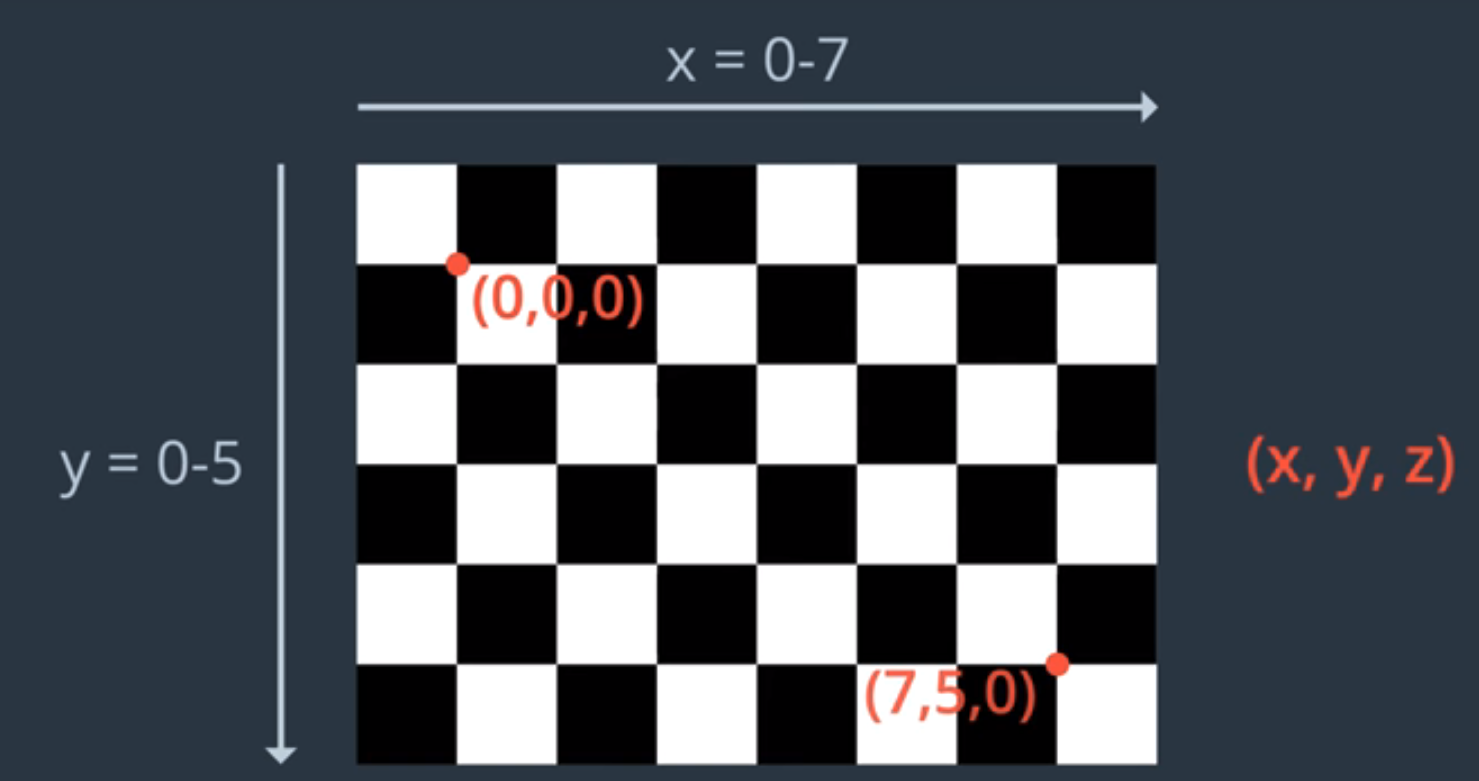

In [5]:
import glob
%matplotlib qt
# Arrays to store the object points and image points from all the images

images = glob.glob("../calibration_image/calibration*.jpg")

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0)....., (7,5,0)
# rows --> point
# columns --> x, y, z
# z will stay a 0
objp = np.zeros((6*8, 3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) # x, y coordinates

for fname in images:
    img = mpimg.imread(fname)
    
    #convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect the corners of the board
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)

NameError: name 'img' is not defined

In [ ]:
# calibrate the camera
# ret:
# mtx: camera matrix
# dist: distortion coefficients
# rvecs: position of the camera in the world - rotation vector
# tvecs: position of the camera in the world - translation vector

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1,None,None])

In [ ]:
# Undistort the image. Creation of the "Destination image"
dst = cv2.undistort(img, mtx, dist, None, mtx)